# Comcast Telecom Consumer Complaints

1.  Import data into Python environment

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
# Import csv file
data = pd.read_csv("C:\\New folder\\Comcast_telecom_complaints_data.csv")

In [7]:
# view data
data.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [8]:
#check for null values
print (data.isnull().sum())

Ticket #                       0
Customer Complaint             0
Date                           0
Date_month_year                0
Time                           0
Received Via                   0
City                           0
State                          0
Zip code                       0
Status                         0
Filing on Behalf of Someone    0
dtype: int64


In [10]:
# view shape of the data
data.shape

(2224, 11)

In [11]:
# Drop the Ticket and time coulmn
data=data.drop(['Ticket #','Time'], axis=1)

In [12]:
# view data after droping 2 columns
data.head()

,Customer Complaint,Date,Date_month_year,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,Payment disappear - service got disconnected,04-08-15,04-Aug-15,Internet,Acworth,Georgia,30102,Closed,No
2,Speed and Service,18-04-15,18-Apr-15,Internet,Acworth,Georgia,30101,Closed,Yes
3,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,Internet,Acworth,Georgia,30101,Open,Yes
4,Comcast not working and no service to boot,26-05-15,26-May-15,Internet,Acworth,Georgia,30101,Solved,No


In [13]:
# view shape of the data after dropping 2 columns
data.shape

(2224, 9)

2. Provide the trend chart for the number of complaints at monthly and daily granularity levels.

In [17]:
data['Date_month_year']=data['Date_month_year'].apply(pd.to_datetime)
data=data.set_index('Date_month_year')

Text(0.5, 1.0, 'Monthly Trends Chart')

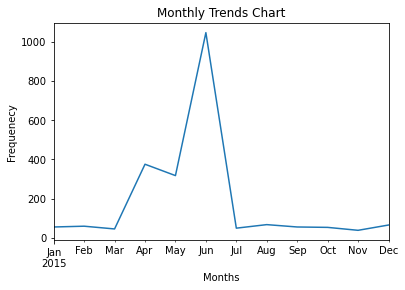

In [19]:
months= data.groupby(pd.Grouper(freq="M")).size().plot()
plt.xlabel("Months")
plt.ylabel("Frequenecy")
plt.title("Monthly Trends Chart")

#Conclusion 
complaints for the month of june 2015 are maximum.

In [20]:
data["Date"].value_counts(dropna=False)[:8]

24-06-15    218
23-06-15    190
25-06-15     98
26-06-15     55
30-06-15     53
29-06-15     51
18-06-15     47
06-12-15     43
Name: Date, dtype: int64

Text(0.5, 1.0, 'Daily Trends Chart')

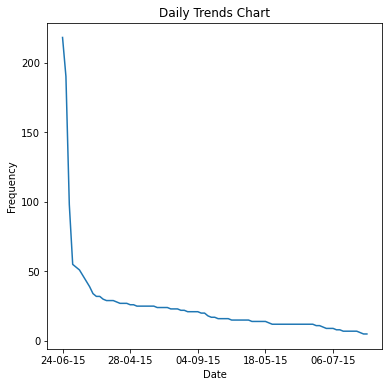

In [21]:
# Daily trebnds Chart
data = data.sort_values(by='Date')
plt.figure(figsize=(6,6))
data['Date'].value_counts().plot()
plt.xlabel("Date")
plt.ylabel("Frequency")
plt.title("Daily Trends Chart")

3. Provide a table with the frequency of complaint types.

In [22]:
data['Customer Complaint'].value_counts(dropna=False)[:9]

Comcast                     83
Comcast Internet            18
Comcast Data Cap            17
comcast                     13
Data Caps                   11
Comcast Billing             11
Comcast Data Caps           11
Unfair Billing Practices     9
Comcast data caps            8
Name: Customer Complaint, dtype: int64

<AxesSubplot:>

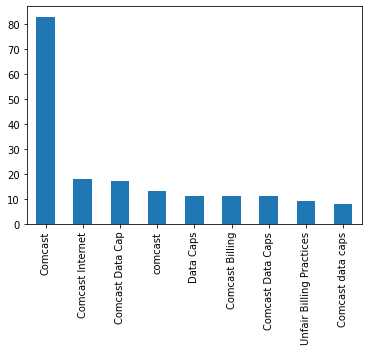

In [26]:
data['Customer Complaint'].value_counts(dropna=False)[0:9].plot.bar()

#4. Complaint types are maximum i.e., around internet, network issues, or across any other domains.

In [29]:
# check count for customer complaint each category
internet_issues1=data[data["Customer Complaint"].str.contains('network')].count()

In [31]:
internet_issues2=data[data["Customer Complaint"].str.contains('speed')].count()

In [32]:
internet_issues3=data[data["Customer Complaint"].str.contains('data')].count()

In [33]:
internet_issues4=data[data["Customer Complaint"].str.contains('internet')].count()

In [40]:
total_internet_issue=internet_issues1+internet_issues2+internet_issues3+internet_issues4
print(total_internet_issue)

Customer Complaint             374
Date                           374
Received Via                   374
City                           374
State                          374
Zip code                       374
Status                         374
Filing on Behalf of Someone    374
dtype: int64


In [34]:
billing_issues1=data[data["Customer Complaint"].str.contains('bill')].count()

In [35]:
billing_issues2=data[data["Customer Complaint"].str.contains('billing')].count()

In [36]:
billing_issues3=data[data["Customer Complaint"].str.contains('charges')].count()

In [41]:
total_billing_issues=billing_issues1+billing_issues2+billing_issues3
print(total_billing_issues)

Customer Complaint             353
Date                           353
Received Via                   353
City                           353
State                          353
Zip code                       353
Status                         353
Filing on Behalf of Someone    353
dtype: int64


In [37]:
service_issues1=data[data["Customer Complaint"].str.contains('service')].count()

In [38]:
service_issues2=data[data["Customer Complaint"].str.contains('customer')].count()

In [42]:
total_service_issues=service_issues1+service_issues2
print(total_service_issues)

Customer Complaint             360
Date                           360
Received Via                   360
City                           360
State                          360
Zip code                       360
Status                         360
Filing on Behalf of Someone    360
dtype: int64


In [50]:
Total_other_issues=2224-(total_billing_issues+total_internet_issue+total_service_issues)
print(Total_other_issues)

Customer Complaint             1137
Date                           1137
Received Via                   1137
City                           1137
State                          1137
Zip code                       1137
Status                         1137
Filing on Behalf of Someone    1137
dtype: int64


Conclusion 
total_internet_issue are 374
total_billing_issues are 353
total_service_issues are 360
Total_other_issues are 1137 out of 2224

5. Create a new categorical variable with value as Open and Closed. 
Open & Pending is to be categorized as Open and Closed & 
Solved is to be categorized as Closed.

In [51]:
data.Status.unique()

array(['Closed', 'Open', 'Solved', 'Pending'], dtype=object)

In [54]:
data["newStatus"]=["Open" if Status=="Open" or Status=="Pending" else "Closed"for Status in data ["Status"]]
data=data.drop(['Status'],axis=1)
data

,Customer Complaint,Date,Received Via,City,State,Zip code,Filing on Behalf of Someone,newStatus
Date_month_year,,,,,,,,
2015-01-04,Fraudulent claims reported to collections agency,04-01-15,Customer Care Call,Atlanta,Georgia,30312,No,Closed
2015-01-04,Comcast refusal of service,04-01-15,Customer Care Call,Wayne,Pennsylvania,19087,No,Closed
2015-01-04,Comcast Cable,04-01-15,Internet,Franklin,Tennessee,37067,No,Closed
2015-01-04,Data Overages,04-01-15,Internet,Savannah,Georgia,31406,No,Closed
2015-01-04,Comcast,04-01-15,Internet,North Huntingdon,Pennsylvania,15642,No,Closed
...,...,...,...,...,...,...,...,...
2015-05-31,Comcast,31-05-15,Customer Care Call,Beaverton,Oregon,97006,No,Open
2015-05-31,Comcast of East Windsor NJ Complaint,31-05-15,Internet,East Windsor,New Jersey,8520,No,Open
2015-05-31,n/a (b) (6),31-05-15,Internet,Loganville,Georgia,30052,No,Open


In [55]:
data.shape

(2224, 8)

#6 Which state has the maximum complaints

In [59]:
data.groupby(["State"]).size().sort_values(ascending=False)[:5]

State
Georgia       288
Florida       240
California    220
Illinois      164
Tennessee     143
dtype: int64

Georgia state have maximum complaint (288)

#7 State wise status of complaints in a stacked bar chart

In [60]:
Status_complaints = data.groupby(["State","newStatus"]).size().unstack()
print(Status_complaints)

newStatus             Closed  Open
State                             
Alabama                 17.0   9.0
Arizona                 14.0   6.0
Arkansas                 6.0   NaN
California             159.0  61.0
Colorado                58.0  22.0
Connecticut              9.0   3.0
Delaware                 8.0   4.0
District Of Columbia    14.0   2.0
District of Columbia     1.0   NaN
Florida                201.0  39.0
Georgia                208.0  80.0
Illinois               135.0  29.0
Indiana                 50.0   9.0
Iowa                     1.0   NaN
Kansas                   1.0   1.0
Kentucky                 4.0   3.0
Louisiana               12.0   1.0
Maine                    3.0   2.0
Maryland                63.0  15.0
Massachusetts           50.0  11.0
Michigan                92.0  23.0
Minnesota               29.0   4.0
Mississippi             23.0  16.0
Missouri                 3.0   1.0
Montana                  1.0   NaN
Nevada                   1.0   NaN
New Hampshire       

<AxesSubplot:xlabel='State'>

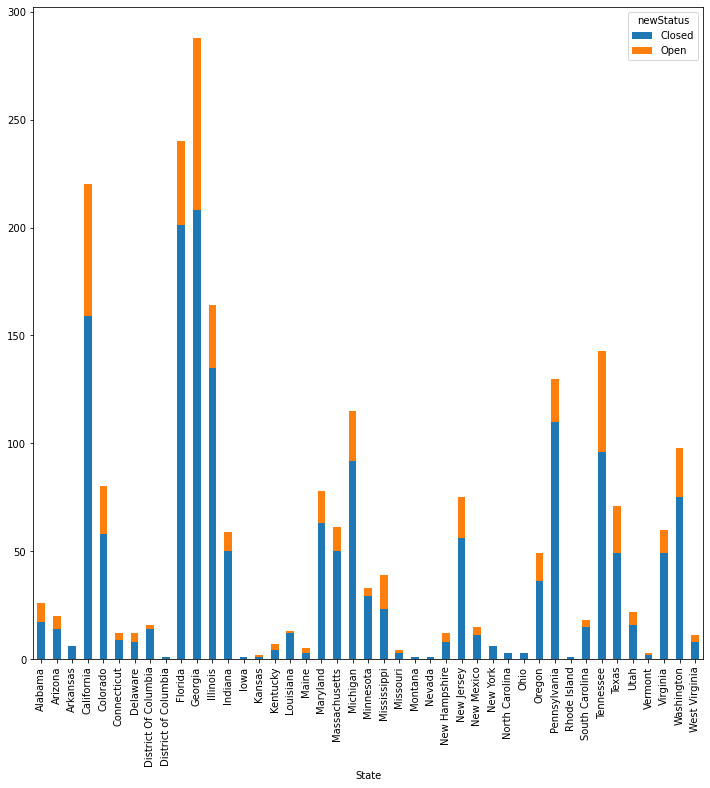

In [61]:
Status_complaints.plot.bar(figsize=(12,12), stacked=True)

#conclusion
Georgia state have maximum complaint (288) from bar chart

8. State has the highest percentage of unresolved complaints

In [63]:
print(data['newStatus'].value_counts())

Closed    1707
Open       517
Name: newStatus, dtype: int64


In [64]:
unresolved_data = data.groupby(["State","newStatus"]).size().unstack().fillna(0).sort_values(by='Open',ascending=False)
unresolved_data["Unresolved_cmp_prct"]= unresolved_data["Open"]/unresolved_data["Open"].sum()*100
print(unresolved_data)

newStatus             Closed  Open  Unresolved_cmp_prct
State                                                  
Georgia                208.0  80.0            15.473888
California             159.0  61.0            11.798839
Tennessee               96.0  47.0             9.090909
Florida                201.0  39.0             7.543520
Illinois               135.0  29.0             5.609284
Washington              75.0  23.0             4.448743
Michigan                92.0  23.0             4.448743
Colorado                58.0  22.0             4.255319
Texas                   49.0  22.0             4.255319
Pennsylvania           110.0  20.0             3.868472
New Jersey              56.0  19.0             3.675048
Mississippi             23.0  16.0             3.094778
Maryland                63.0  15.0             2.901354
Oregon                  36.0  13.0             2.514507
Virginia                49.0  11.0             2.127660
Massachusetts           50.0  11.0             2

<AxesSubplot:xlabel='State'>

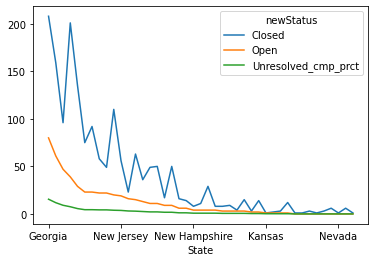

In [65]:
unresolved_data.plot()

#conclusion
Georgia state have maximum unresolved complaints

#9. Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls

In [66]:
resolved_data = data.groupby(["Received Via",'newStatus']).size().unstack().fillna(0)
resolved_data['resolved'] = resolved_data['Closed']/resolved_data['Closed'].sum()*100
resolved_data['resolved']

Received Via
Customer Care Call    50.615114
Internet              49.384886
Name: resolved, dtype: float64

<AxesSubplot:xlabel='Received Via'>

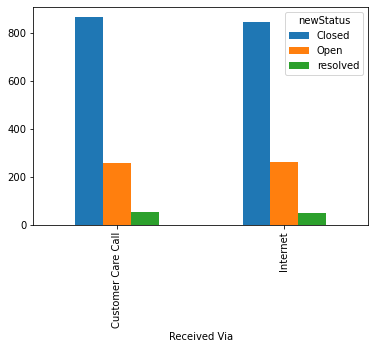

In [68]:
resolved_data.plot(kind='bar')